In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
try:
    import numdifftools as nd
except:
    sys.stderr.write("Cannot load numdifftools.\n")

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from registration_utilities import *
from annotation_utilities import *

Cannot load numdifftools.


Setting environment for Precision WorkStation


No vtk
No vtkNot using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD585/MD585_prep2_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD590/MD590_prep2_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD591/MD591_prep2_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD592/MD592_prep2_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD593/MD593_prep2_thumbnail/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD594/MD594_prep2_thumbnail/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_thumbnail.tif
/media/

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD602/MD602_prep2_thumbnail/MD602-N19-2015.12.01-16.24.09_MD602_2_0056_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD603/MD603_prep2_thumbnail/MD603-N11-2016.03.02-12.51.47_MD603_1_0031_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD635/MD635_prep2_thumbnail/MD635-F25-2016.05.18-21.02.30_MD635_3_0075_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD653/MD653_prep2_thumbnail/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD642/MD642_prep2_thumbnail/MD642-N14-2017.01.18-16.25.58_MD642_2_0041_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD657/MD657_prep2_thumbnail/MD657-N13-2017.02.22-14.33.34_MD657_3_0039_prep2_thumbnail.tif
/media/yuncon

Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_thumbnail/MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103_prep2_thumbnail.tif
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail/ChatCryoJane201710_slide1-S1_prep2_thumbnail.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail"
0
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail/ChatCryoJane201710_slide1-S1_prep2_thumbnail.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail/ChatCryoJane201710_slide1-S1_prep2_thumbnail.tif"
1
/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail/ChatCryoJane201710_slide1-S1_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnai

Not using image_cache.
Not using image_cache.


In [2]:
warp_setting = 17
detector_id = 15

In [3]:
warp_properties = registration_settings.loc[warp_setting]
print warp_properties

upstream_warp_setting = warp_properties['upstream_warp_id']
if upstream_warp_setting == 'None':
    upstream_warp_setting = None
else:
    upstream_warp_setting = int(upstream_warp_setting)
    
transform_type = warp_properties['transform_type']
terminate_thresh = warp_properties['terminate_thresh']
grad_computation_sample_number = int(warp_properties['grad_computation_sample_number'])
if not np.isnan(warp_properties['grid_search_sample_number']):
    grid_search_sample_number = int(warp_properties['grid_search_sample_number'])
if not np.isnan(warp_properties['std_tx_um']):
    std_tx_um = warp_properties['std_tx_um']
    std_tx = std_tx_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
if not np.isnan(warp_properties['std_ty_um']):
    std_ty_um = warp_properties['std_ty_um']
    std_ty = std_ty_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
if not np.isnan(warp_properties['std_tz_um']):
    std_tz_um = warp_properties['std_tz_um']
    std_tz = std_tz_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
if not np.isnan(warp_properties['std_theta_xy_degree']):
    std_theta_xy = np.deg2rad(warp_properties['std_theta_xy_degree'])
if not np.isnan(warp_properties['max_iter_num']):
    max_iter_num = int(warp_properties['max_iter_num'])
    
try:
    surround_weight = float(warp_properties['surround_weight'])
    include_surround = surround_weight != 0 and not np.isnan(surround_weight)
except:
    surround_weight = str(warp_properties['surround_weight'])
    include_surround = True

reg_weight = warp_properties['regularization_weight']
if np.isnan(reg_weight):
    reg_weights = np.zeros((3,))
else:
    reg_weights = np.ones((3,))*reg_weight

print
print 'surround', surround_weight
print 'regularization', reg_weights

positive_weight = 'size'

upstream_warp_id                                                  20
transform_type                                                 rigid
terminate_thresh                                                 NaN
grad_computation_sample_number                                 10000
grid_search_sample_number                                        NaN
std_tx_um                                                        NaN
std_ty_um                                                        NaN
std_tz_um                                                        NaN
std_theta_xy_degree                                              NaN
surround_weight                                              inverse
regularization_weight                                              0
comment                           local reg with surr no grid search
max_iter_num                                                    1000
Name: 17, dtype: object

surround inverse
regularization [0. 0. 0.]


In [4]:
stack_moving = 'atlasV5'

In [5]:
# Load all pre-computed z-scores.

zscores_all_stacks_all_structures_all_poolradius = defaultdict(dict)

for stack_fixed in all_nissl_stacks:
    for structure in all_known_structures_sided:
        try:
            zscores = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                                  detector_id_f=detector_id,
                                                  prep_id_f=2,
                                               warp_setting=warp_setting,
                                                structure_f=structure,
                                                  structure_m=structure,
                                               what='zscores')
            zscores = {float(i): t for i, t in zscores.iteritems()}
            zscores_all_stacks_all_structures_all_poolradius[stack_fixed][structure] = zscores
            
        except Exception as e:
            sys.stderr.write('Error loading confidence %s: %s.\n' % (structure, e))
                
zscores_all_stacks_all_structures_all_poolradius.default_factory = None

In [6]:
# Load all pre-computed hessians.

hessians_all_stacks_all_structures_all_stepsizes = defaultdict(dict)

for stack_fixed in all_nissl_stacks:
    for structure in all_known_structures_sided:
        try:
            hessians_all_stepsizes = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                                  detector_id_f=detector_id,
                                                  prep_id_f=2,
                                               warp_setting=warp_setting,
                                                structure_f=structure,
                                                  structure_m=structure,
                                               what='hessians')

            hessians_all_stepsizes = {float(i): t for i, t in hessians_all_stepsizes.iteritems()}
            hessians_all_stacks_all_structures_all_stepsizes[stack_fixed][structure] = hessians_all_stepsizes
            
        except Exception as e:
            sys.stderr.write('Error loading confidence %s: %s.\n' % (structure, e))
                
hessians_all_stacks_all_structures_all_stepsizes.default_factory = None

In [7]:
pool_radius_um_list = np.array([25, 50, 100, 150, 200, 300, 400])
stepsize_um_list = np.array([25, 50, 100, 150, 200, 300, 400])

In [11]:
peakradius_max_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
peakradius_min_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
peakradius_x_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
peakradius_y_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
peakradius_z_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

peakradius_max_normalized_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

# for stack in ['MD595']:
for stack in all_nissl_stacks:
#     for struct in ['7N_L']:
    for struct in all_known_structures_sided:
        
        print stack, struct
        
        stack_spec = dict(name=stack_fixed,
                   vol_type='score',
                   detector_id=15,
                   prep_id=2,
                   structure=None,
                   resolution='down32')
        alignedAtlas_vol_m2f = DataManager.load_transformed_volume(stack_m=stack_moving, stack_f=stack_fixed,
                                                        prep_id_f=2,
                                                        detector_id_f=detector_id,
                                                        warp_setting=17, 
                                                       structure=structure)
        
#         for step_um in stepsize_um_list:
#             for pool_um in pool_radius_um_list:
        for step_um in [25]:
            for pool_um in [100]:
#                 if step_um == pool_um:
                try:
                    H, fmax = hessians_all_stacks_all_structures_all_stepsizes[stack][struct][step_um]
                    z, fmax, mu, std = zscores_all_stacks_all_structures_all_poolradius[stack][struct][pool_um]

                    U, S, VT = np.linalg.svd(H/std)
#                     print step_um, z, fmax, mu, std, S, np.abs(np.linalg.det(H/std)), np.sqrt(2*(z-0)/S[-1]), np.sqrt(2*(z-0)/S[0])
#                     U, S, VT = np.linalg.svd(H)
#                     print step_um, z, fmax, mu, std, S, np.abs(np.linalg.det(H)), np.sqrt(2*(fmax-mu)/S[-1]), np.sqrt(2*(fmax-mu)/S[0])
#                     print 

                    peakradius_max_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/S[-1]) * XY_PIXEL_DISTANCE_TB
                    peakradius_min_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/S[0]) * XY_PIXEL_DISTANCE_TB
    
#                     print np.sqrt(2*(z-0)/S[-1]) , structure_length_least_certain_dir_down32Resol
                    structure_length_least_certain_dir_down32Resol = get_structure_length_at_direction(alignedAtlas_vol_m2f > 0.5, U[:, -1])
                    peakradius_max_normalized_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/S[-1]) / structure_length_least_certain_dir_down32Resol
        
                    peakradius_x_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/np.abs(H[0,0]/std)) * XY_PIXEL_DISTANCE_TB
                    peakradius_y_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/np.abs(H[1,1]/std)) * XY_PIXEL_DISTANCE_TB
                    peakradius_z_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/np.abs(H[2,2]/std)) * XY_PIXEL_DISTANCE_TB
                except Exception as e:
                    raise e
                    sys.stderr.write("Error computing confidence for %s,%s\n" % (stack, struct))

MD585 5N_L
MD585 5N_R
MD585 6N_L
MD585 6N_R
MD585 7N_L
MD585 7N_R
MD585 7n_L
MD585 7n_R
MD585 Amb_L
MD585 Amb_R
MD585 LC_L
MD585 LC_R
MD585 LRt_L
MD585 LRt_R
MD585 Pn_L
MD585 Pn_R
MD585 Tz_L
MD585 Tz_R
MD585 VLL_L
MD585 VLL_R
MD585 RMC_L
MD585 RMC_R
MD585 SNC_L
MD585 SNC_R
MD585 SNR_L
MD585 SNR_R
MD585 3N_L
MD585 3N_R
MD585 4N_L
MD585 4N_R
MD585 Sp5I_L
MD585 Sp5I_R
MD585 Sp5O_L
MD585 Sp5O_R
MD585 Sp5C_L
MD585 Sp5C_R
MD585 PBG_L
MD585 PBG_R
MD585 10N_L
MD585 10N_R
MD585 VCA_L
MD585 VCA_R
MD585 VCP_L
MD585 VCP_R
MD585 DC_L
MD585 DC_R
MD585 AP
MD585 12N
MD585 RtTg
MD585 SC
MD585 IC
MD589 5N_L
MD589 5N_R
MD589 6N_L
MD589 6N_R
MD589 7N_L
MD589 7N_R
MD589 7n_L
MD589 7n_R
MD589 Amb_L
MD589 Amb_R
MD589 LC_L
MD589 LC_R
MD589 LRt_L
MD589 LRt_R
MD589 Pn_L
MD589 Pn_R
MD589 Tz_L
MD589 Tz_R
MD589 VLL_L
MD589 VLL_R
MD589 RMC_L
MD589 RMC_R
MD589 SNC_L
MD589 SNC_R
MD589 SNR_L
MD589 SNR_R
MD589 3N_L
MD589 3N_R
MD589 4N_L
MD589 4N_R
MD589 Sp5I_L
MD589 Sp5I_R
MD589 Sp5O_L
MD589 Sp5O_R
MD589 Sp5C_L
MD589 S

# Plot z-score

In [6]:
pool_radius = 100
hessian_stepsize = 25

In [7]:
zscore_allstacks_allstructures_oneCombination = {
    stack:
    {struct: x[pool_radius][0]
    for struct, x in x_per_stack.iteritems()}
    for stack, x_per_stack in zscores_all_stacks_all_structures_all_poolradius.iteritems()
}

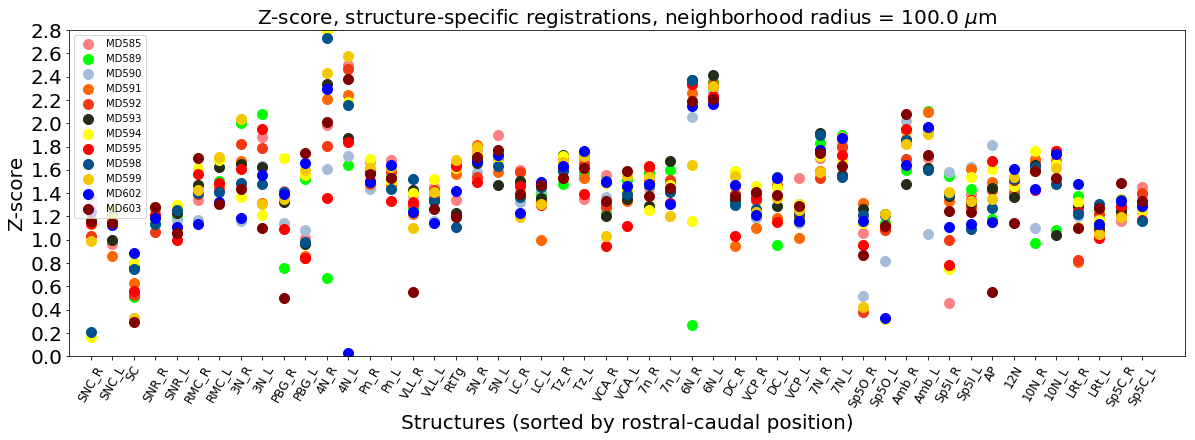

In [96]:
plot_by_stack_by_structure(zscore_allstacks_allstructures_oneCombination, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                          stack_to_color=stack_to_color,
                          yticks=np.arange(0, 3, .2),
                           yticklabel_fmt='%.1f',
                          ylabel='Z-score',
                          title='Z-score, structure-specific registrations, neighborhood radius = %.1f $\mu$m' % pool_radius,
                          xlabel='Structures (sorted by rostral-caudal position)',
                           xticks_fontsize=12,
                          );

In [97]:
np.nanmedian([y for x in zscore_allstacks_allstructures_oneCombination.values() for y in x.values()])

1.412866365005278

# Identify high-confidence structures in one particular brain

In [21]:
for stack in all_nissl_stacks:
    print stack, np.count_nonzero(np.array(zscore_allstacks_allstructures_oneCombination[stack].values()) > 1.8)

MD585 8
MD589 6
MD590 5
MD591 8
MD592 6
MD593 5
MD594 5
MD595 6
MD598 6
MD599 7
MD602 5
MD603 5


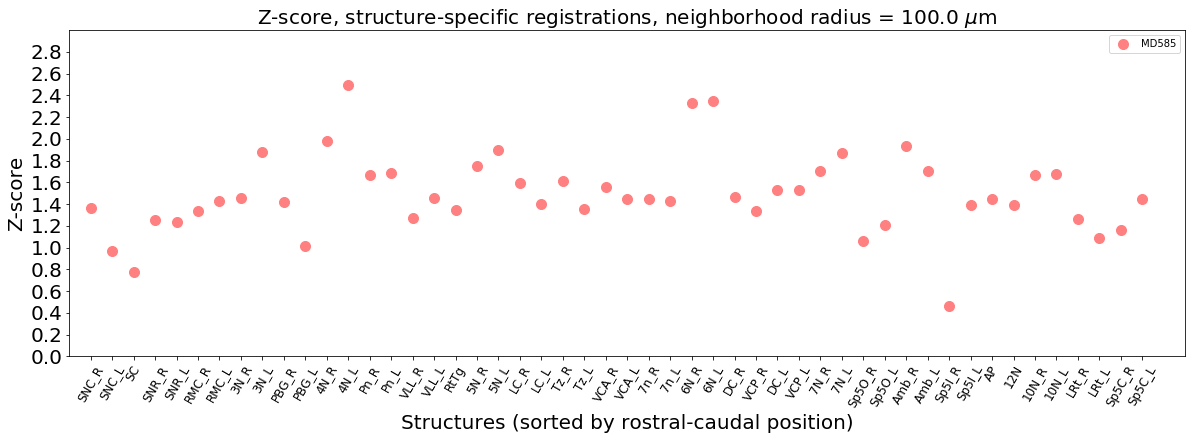

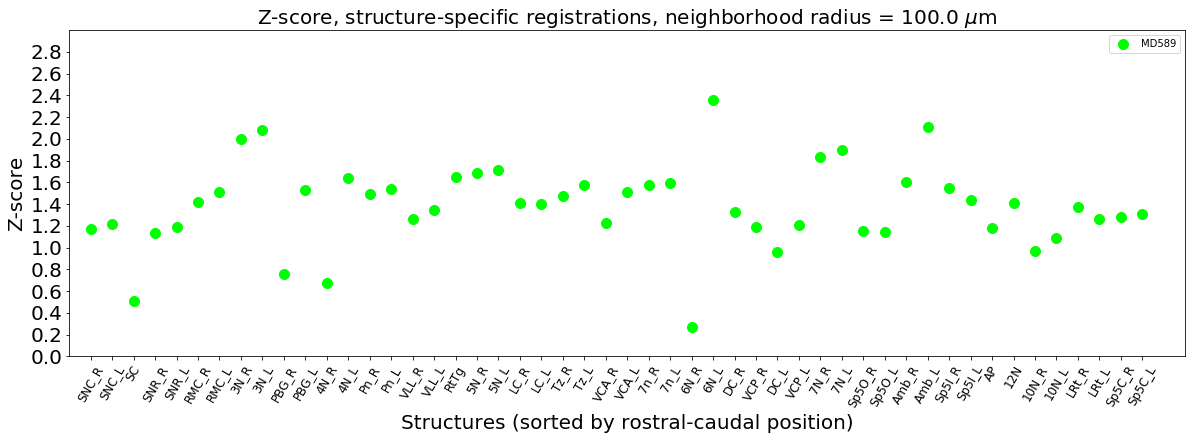

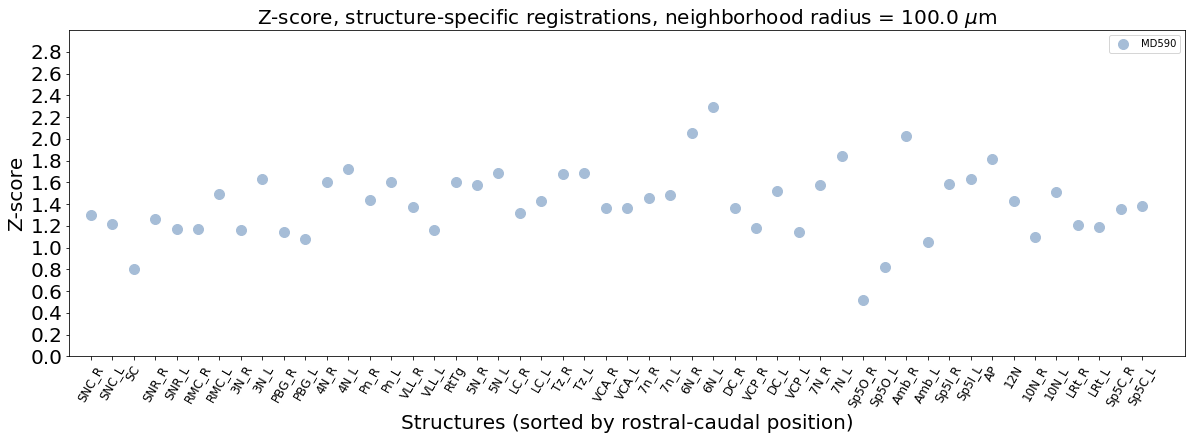

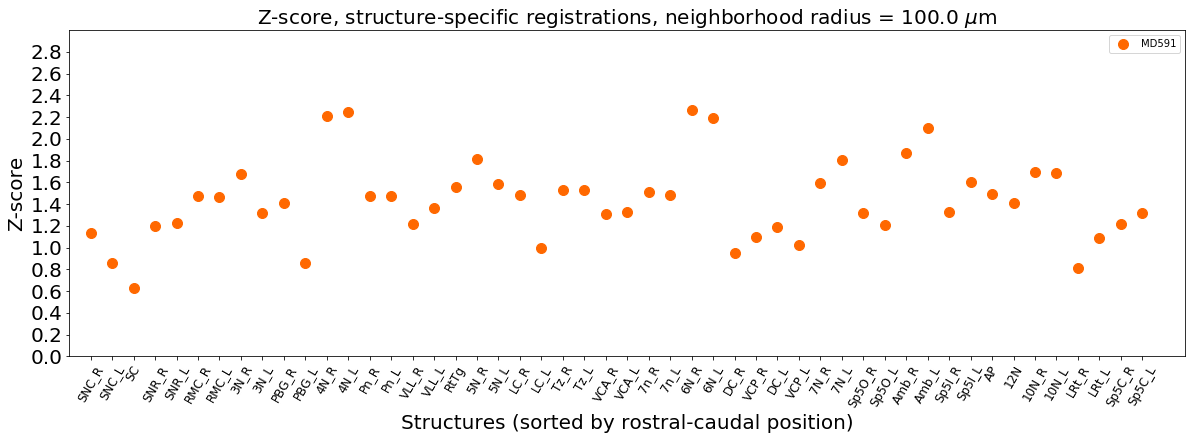

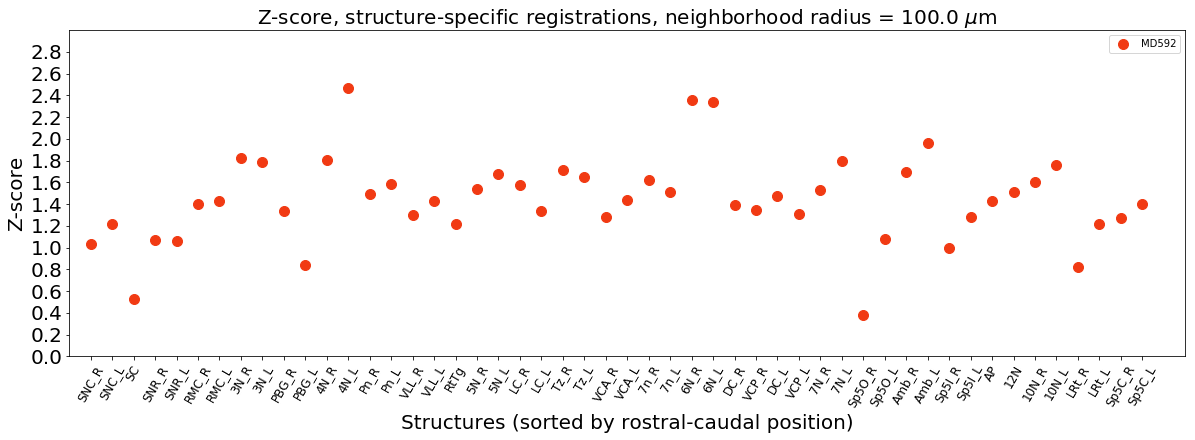

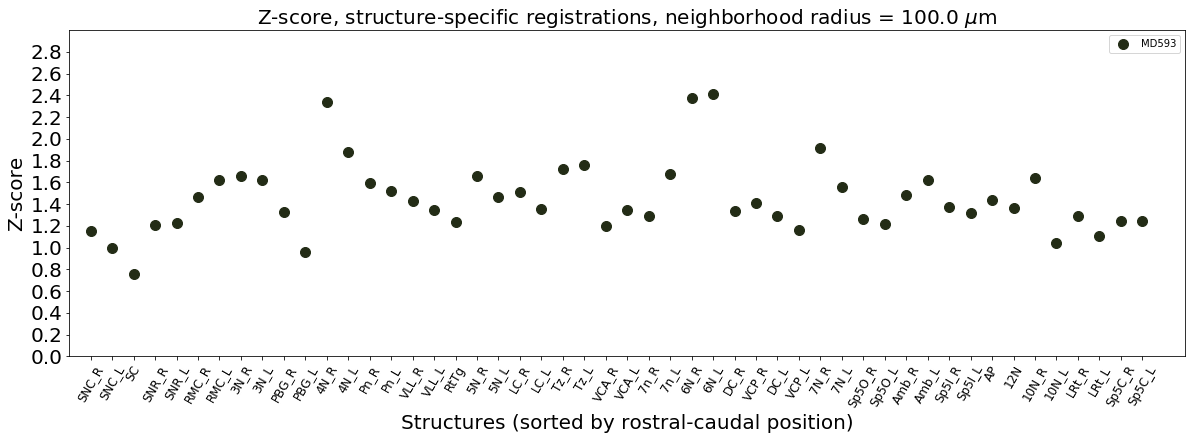

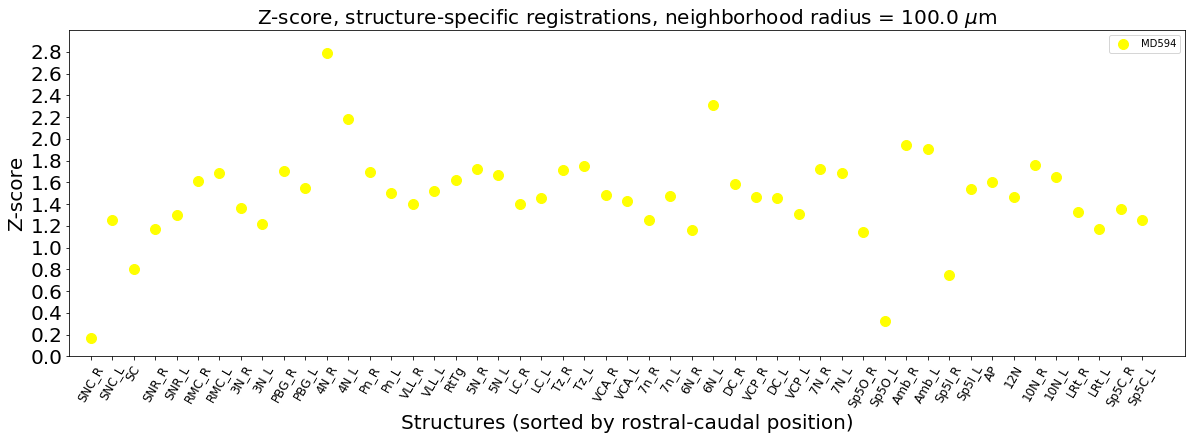

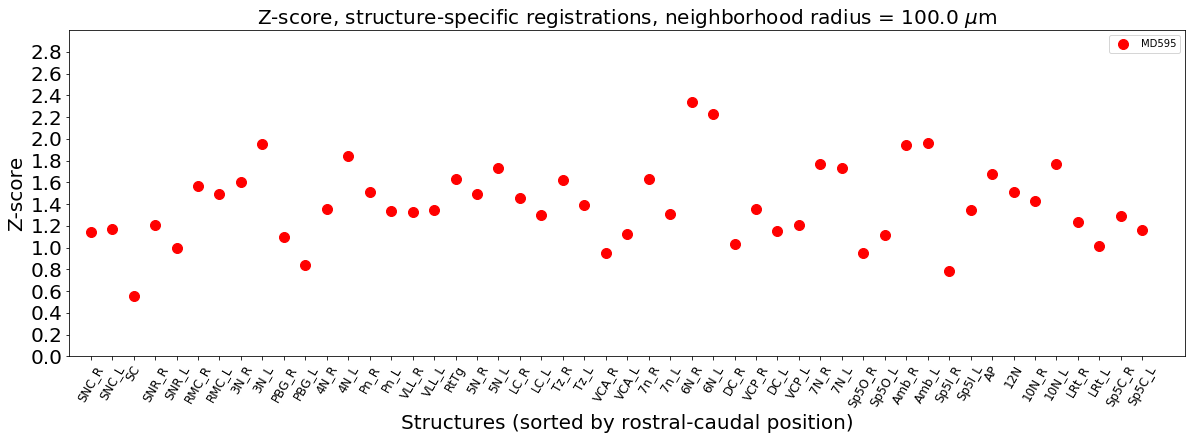

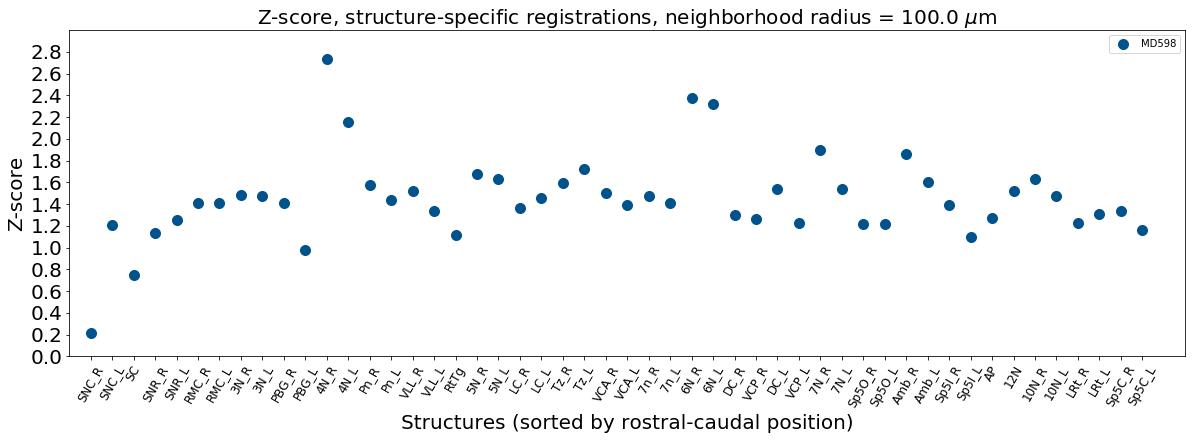

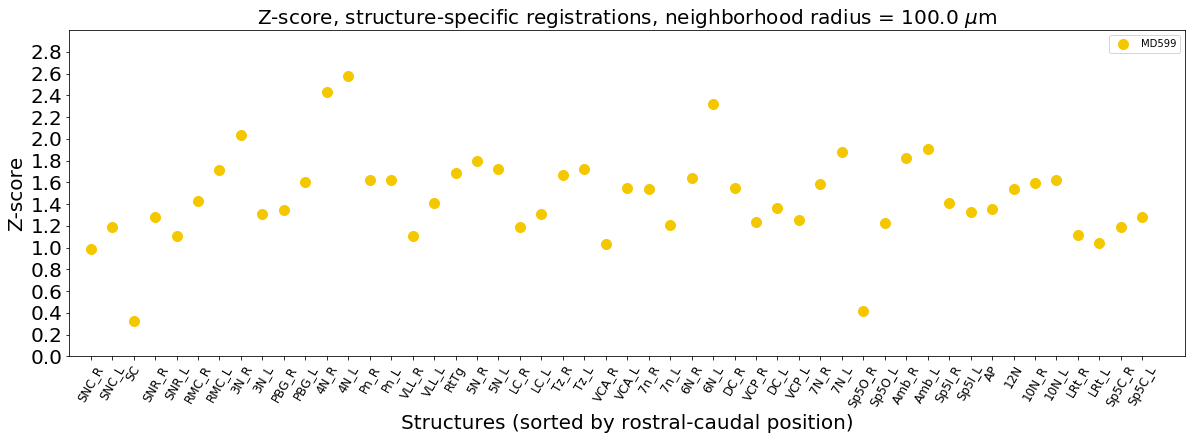

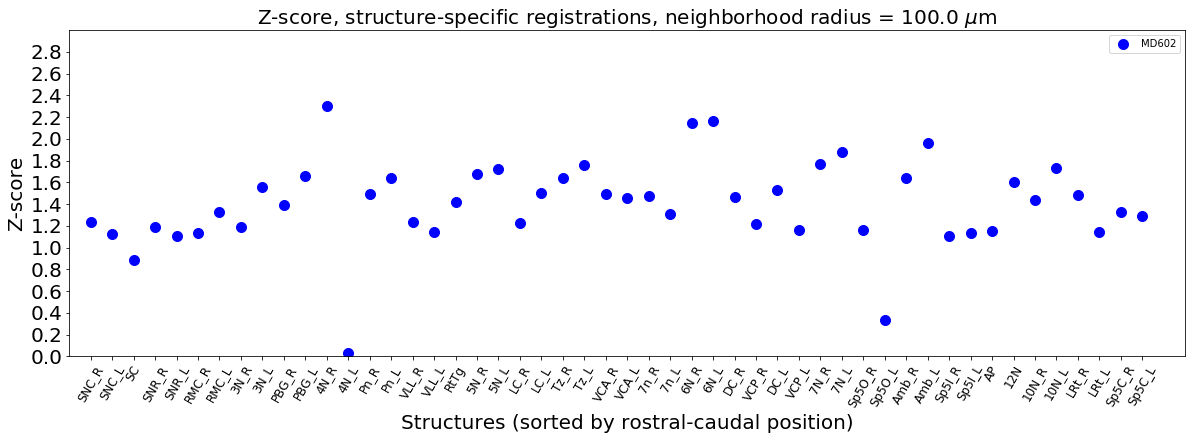

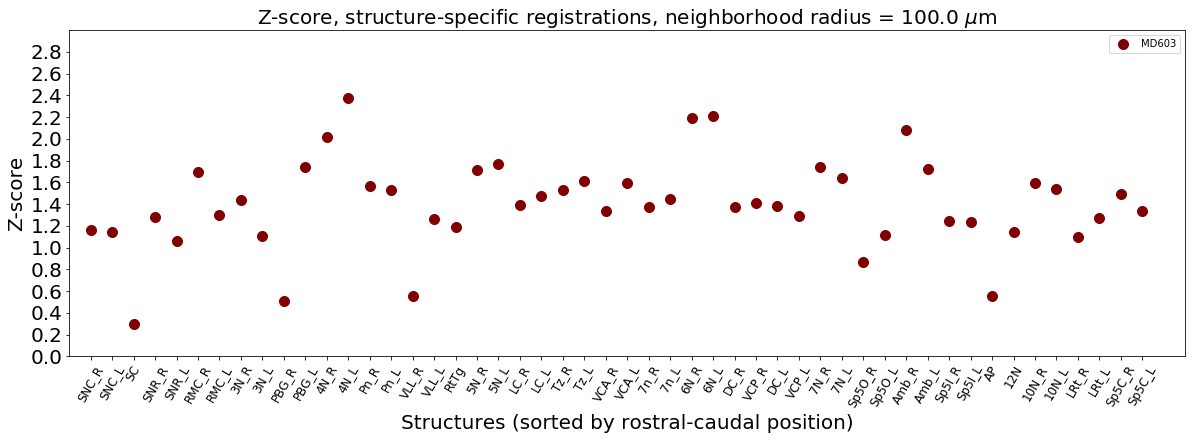

In [16]:
for stack in all_nissl_stacks:

    plot_by_stack_by_structure({stack: zscore_allstacks_allstructures_oneCombination[stack]}, 
                               structures=structures_sided_sorted_by_rostral_caudal_position,
                              stack_to_color=stack_to_color,
                              yticks=np.arange(0, 3, .2),
                               yticklabel_fmt='%.1f',
                              ylabel='Z-score',
                              title='Z-score, structure-specific registrations, neighborhood radius = %.1f $\mu$m' % pool_radius,
                              xlabel='Structures (sorted by rostral-caudal position)',
                               xticks_fontsize=12,
                              );

# Plot margin

In [41]:
peak_radius_max_um_allstacks_allstructures_oneCombination = {
    stack:
    {struct: x[hessian_stepsize][pool_radius]
    for struct, x in x_per_stack.iteritems()}
    for stack, x_per_stack in peakradius_max_um_allstacks_allstructures_allsteps_allpools.iteritems()
}

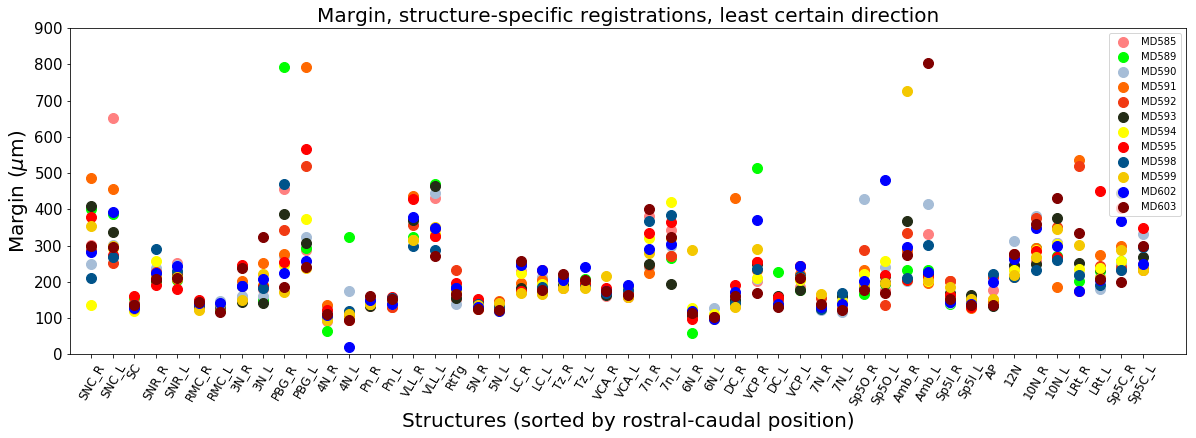

In [76]:
plot_by_stack_by_structure(peak_radius_max_um_allstacks_allstructures_oneCombination, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                          stack_to_color=stack_to_color,
                          yticks=np.arange(0, 1000, 100),
                           yticklabel_fmt='%d',
                          ylabel='Margin ($\mu$m)',
                          title='Margin, structure-specific registrations, least certain direction',
                          xlabel='Structures (sorted by rostral-caudal position)',
                        xticks_fontsize=12,
                           yticks_fontsize=15
);

In [77]:
np.nanmedian([y for x in peak_radius_max_um_allstacks_allstructures_oneCombination.values() for y in x.values()])

192.5375700716678

# Plot normalized margin

In [79]:
peak_radius_max_normalized_allstacks_allstructures_oneCombination = {
    stack:
    {struct: x[hessian_stepsize][pool_radius]
    for struct, x in x_per_stack.iteritems()}
    for stack, x_per_stack in peakradius_max_normalized_allstacks_allstructures_allsteps_allpools.iteritems()
}

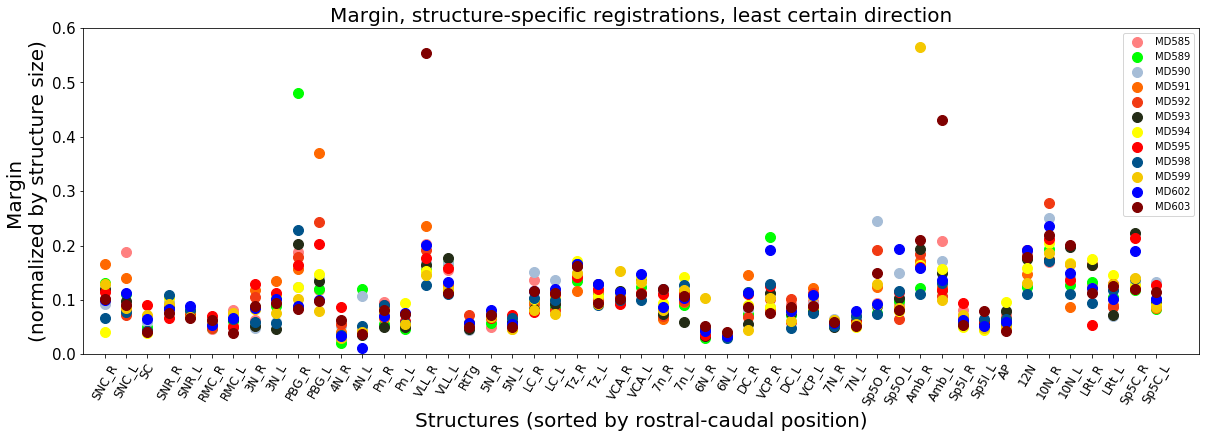

In [95]:
plot_by_stack_by_structure(peak_radius_max_normalized_allstacks_allstructures_oneCombination, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                          stack_to_color=stack_to_color,
                          yticks=np.arange(0, 0.7, 0.1),
                           yticklabel_fmt='%.1f',
                          ylabel='Margin \n(normalized by structure size)',
                          title='Margin, structure-specific registrations, least certain direction',
                           xticks_fontsize=12,
                           yticks_fontsize=15,
                          xlabel='Structures (sorted by rostral-caudal position)');

In [89]:
np.nanmedian([y for x in peak_radius_max_normalized_allstacks_allstructures_oneCombination.values() for y in x.values()])

0.08927911061664245